# Исследование компьютерных игр для интернет-магазина

Из открытых источников доступны исторические данные о продажах игр, пользовательском рейтинге и оценке критиков, жанрах и платформах.

**Цели исследования:**

1. Изучить тренд выпуска компьютерных игр (как ситуация менялась с годами).
2. Посмотреть изменение продаж по платформам. Выявить платформы с наибольшими суммарными продажами.
3. Рассмотреть влияние отзывов пользователей и критиков на продажи внутри платформы.
4. Построить распределение игр по жанрам, выявить наиболее прибыльные жанры.
5. Составить портрет типичного пользователя каждого региона (самая популярная платформа, самые популярные жанры, влияние рейтинга ESPB на продажи в отдельном регионе).
6. Проверить гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC.
7. Проверить гипотезу о различиях в пользовательском рейтинге жанров Action и Sports.
8. Сформулировать общий вывод по результатам исследования.

**Ход исследования:**

1. Обзор данных
2. Предоработка данных
3. Исследовательский анализ данных
4. Типичный портрет пользователя по регионам
5. Статистический анализ данных
6. Заключительный вывод



#### Обзор данных

##### Загрузка необходимых библиотек для работы:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

##### Загрузка данных:

In [2]:
data = pd.read_csv("/datasets/games.csv")

##### Обзор данных

Выведем первые несколько строк датафрейма:

In [3]:
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Видим 11 переменных:

    1) Название игры;
    2) Название платформы;
    3) Год выпуска;
    4) Жанр;
    5) Продажи в Северной Америке (в млн проданных копий);
    6) Продажи в Европе (в млн проданных копий);
    7) Продажи в Японии (в млн проданных копий);
    8) Продажи в других регионах (в млн проданных копий);
    9) Оценка критиков;
    10) Пользовательский рейтинг;
    11) Рейтинг ESRB;

Выведем так же общую информацию о размере датафрейма и типах данных:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Общие предварительныее выводы о качестве исходных данных можно сделать следующие:

    1) В переменных с оценкой критиков, пользовательском рейтинге и ESRB достаточно большой процент пропусков.
    2) В данных содержатся неправильные типы у переменных с годом выпуска (число с плавающей точкой вместо целого числа) и пользовательским рейтингом (строка вместо числа).

#### Предобработка данных

##### Перевод названия стоблцов датафрейма в нижний регистр

Переименуем столбцы, переведя их в нижний регистр:

In [5]:
data.rename(columns=lambda x: x.lower(), inplace=True)

Проверим изменения:

In [6]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

##### Преобразование типов

Проверим еще раз типы у переменных:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изменим тип переменной **year_of_release** на целочисленный:

In [8]:
data['year_of_release'] = data['year_of_release'].fillna(-1)
data['year_of_release'] = data['year_of_release'].astype('int')

Перед изменением строкового типа у переменной **user_score** посмотрим, какие уникальные значения там содержатся:

In [9]:
data["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди списка значений встречается аббревиатура tbd. 

Данная аббревиатура обозначает To Be Determined, что с английского переводится как "будет определено". Иными словами, значение неизвестно, следовательно его можно заменить на NaN, что и сделаем в следующем шаге вместе с изменением типа на числа с плавающей точкой:

In [10]:
data["user_score"] = data["user_score"].replace("tbd", np.NaN)
data['user_score'] = data['user_score'].astype('float')

Проверим, как изменились типы:

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Все переменные имеют правильный тип.

##### Обработка пропусков

Оценим, сколько пропусков в каждом столбце:

In [12]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Видим, что пропуски имеются в семи стоблцах: name, year_of_release, genre, critic_score, user_score и
rating.

Выведем так же процентное соотношение пропущенных значений от общего числа данных:

In [13]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


Видно, что наиболее "проблемными" (от 40 до 50% пропущенных значений) являются 3 столбца: critic_score, user_score и rating. Такие пропуски могли появится из-за отсутствия рейтинга у игры (в процессе исследования нам уже ранее встречалось значение tbd) на текущий момент. Например, игра вышла недавно и рейтинг не был сформирован.

Типы переменных **critic_score** и **user_score** - числовые. Разумней будет оставить пропуски, как есть, чем заполнять каким-то значением.

Переменная **rating** - строковая. Пропущенные значения могли образоваться из-за того, что рейтинг ESRB мог применяться не ко всем компьютерным играм (согласно Википедии, к началу 2003 года рейтинги ESRB получили более 8000 продуктов от 350 издателей). Неизвестный рейтинг следует заменить на значение-заглушку. Например, "no rating":

In [14]:
data["rating"] = data["rating"].replace(np.NaN, "no rating")

Аналогичным образом поступим с переменными **name** и **genre**:

In [15]:
data["name"] = data["name"].replace(np.NaN, "unknown_name")
data["genre"] = data["genre"].replace(np.NaN, "unknown_genre")

Пропуски в оставшейся переменной **year_of_release** в связи с малым количеством удалим (ранее в связи c приведением типа к целочисленному, пропуски были заменены на -1):

In [16]:
data = data[data["year_of_release"] != -1]

Проверим финальное число пропусков:

In [17]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating                0
dtype: int64

Там, где это было возможно, пропуски в данных были устранены.

##### Обработка дубликатов

Проверим данные на наличие явных дубликатов:

In [18]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют в исследуемых данных.

Проверим данные и на наличие неявных дубликатов. Посмотрим, сколько в датасете игр с одинаковыми названием, платформой, жанром и годом выпуска (из проверки исключаем данные по продажам и рейтингу - это данные могут сильно варьироваться от источника к источнику, во-первых, оценки продаж всегда приблизительные, во-вторых, рейтинг - субъективная характеристика и может зависеть от конкретного критика/группы пользователей)

In [19]:
data.duplicated(subset=['name', 'platform', 'genre', "year_of_release"]).sum()

2

Таких дубликатов совсем не много, но все же есть. Устраним их: 

In [20]:
data = data.drop_duplicates(subset= ['name', 'platform', 'genre', "year_of_release"])

Проверим их наличие после удаления:

In [21]:
data.duplicated(subset=['name', 'platform', 'genre', "year_of_release"]).sum()

0

##### Добавление столбца с суммарными продажами по миру

Добавим столбец с суммарными продажами по миру, сложив данные стоблцов по всем продажам:

In [22]:
data["sum_sales"] = data["na_sales"] + data ['eu_sales'] + data['jp_sales'] + data['other_sales']

Выведем измененный датафрейм:

In [23]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38


Столбец отображается корректно. Проверим его тип:

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16444 non-null  object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Столбец с суммарными продажами имеет корректный тип.

#### Исследовательский анализ данных

##### Игры по году выпуска

Построим гистограмму по количеству игру, выпущенных в каждом из годов, начиная с 1980 года и заканчивая 2016 годом:

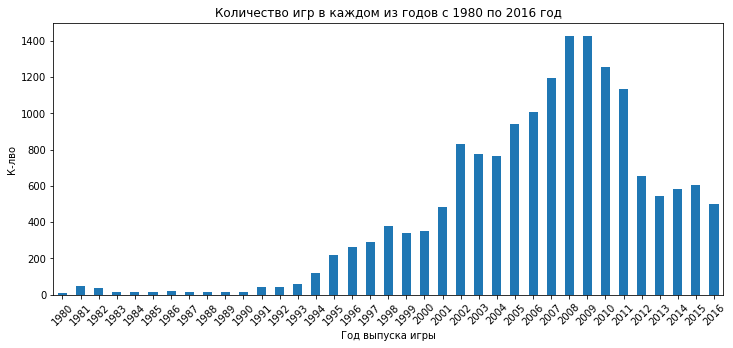

In [25]:
data.groupby("year_of_release")["name"].count().plot.bar(rot=45, xlabel="Год выпуска игры", title="Количество игр в каждом из годов с 1980 по 2016 год", ylabel="К-лво", figsize = (12,5));

Рост выпуска компьютерных игр пришелся на 1994 год. Растущий тренд продлился вплоть до 2009 года. Затем наблюдается спад. Можно предложить, что в 2017 году масштаб выпуска компьютерных игр останется прежним или продолжит падение.

##### Продажи по платформам

Построим гистограмму на основе количество проданных копий, сгруппируя их по платформам. Отберем самые популярные платформы (топ-10):

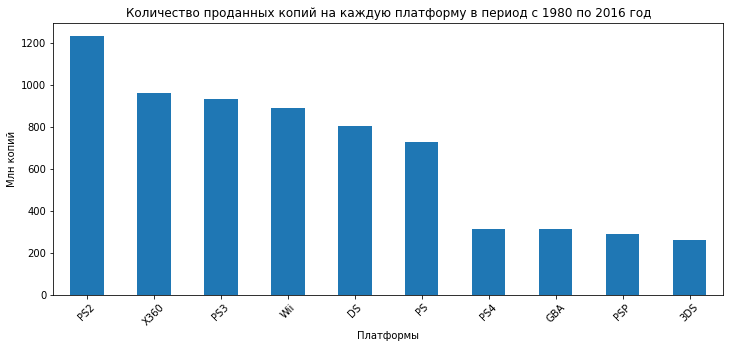

In [26]:
data.groupby("platform")["sum_sales"].sum().sort_values(ascending=False).head(10).plot.bar(rot=45, xlabel="Платформы", ylabel="Млн копий", title="Количество проданных копий на каждую платформу в период с 1980 по 2016 год", figsize = (12,5));

Платформами за наибольшими суммарными продажами за всю историю компьютерных игр являются PS2, X360, PS3, Wii, DS, PS.

##### Срок жизни платформ

Построим график изменения продаж по годам каждой из наиболее популярных платформ:

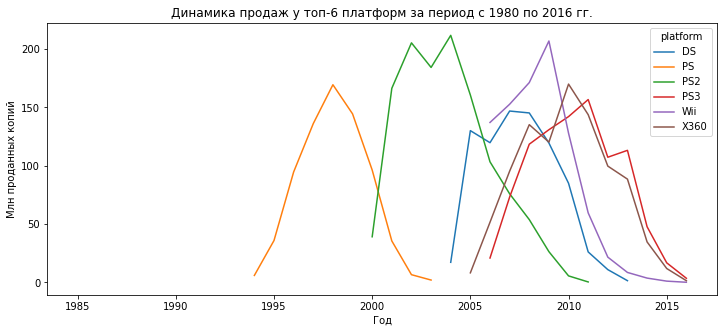

In [27]:
popular_platforms = ["PS2", "X360", "PS3", "Wii", "DS", "PS"]

pd.pivot_table(data[data["platform"].isin(popular_platforms)], index="year_of_release", columns ="platform", values = "sum_sales", aggfunc="sum").plot(title="Динамика продаж у топ-6 платформ за период с 1980 по 2016 гг.", xlabel="Год", ylabel="Млн проданных копий", figsize = (12,5));

Из данных видим, что наиболее ранняя платформа - PS, которая появилась примерно в 1994 году и затем прекратила существование к 2003 году.

Следующая платформа - PS2, которая появился вслед за PS в 2000 году и угасла после 2011 года.

Примерно одновременно появились платформы PS3, Wii, X360, DS в 2004 и 2005 году. Больший пик популярности наблюдается у Wii в 2008 году. Платформа DS прекратила существование к 2013 году. У платформы PS3, Wii, X360 продажи  упали к 2016 году примерно одинаково.

Таким образом, средняя продолжительности жизни платформы около 10 лет.

##### Прибыльность по платформам на текущий период

Для оценки текущей ситуации на рынке компьютерных игр, рассмотрим период последних 3 лет.

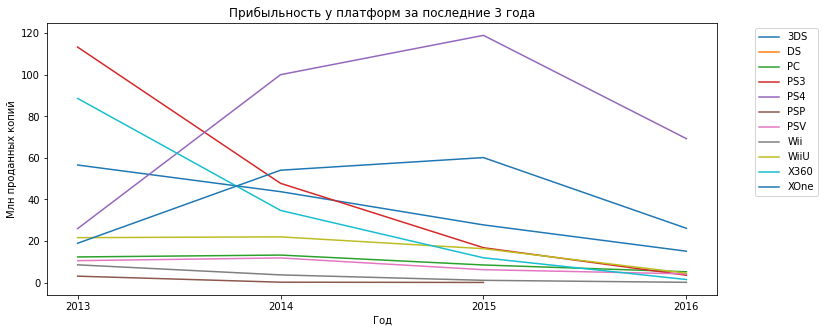

In [28]:
current_data = data.query("year_of_release >= 2013")

pd.pivot_table(current_data, index="year_of_release", columns ="platform", values = "sum_sales", aggfunc="sum").plot(title="Прибыльность у платформ за последние 3 года", ylabel="Млн проданных копий", xlabel="Год", figsize = (12,5)).locator_params(integer=True);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

Исходя из данных графика, видим, что наиболее перспективные платформы сейчас это - PS4 и XOne. Остальные платформы переживают сильнейший спад.

Построим диаграмму размаха и оценим, какая средняя общая прибыль была у каждой из платформ:

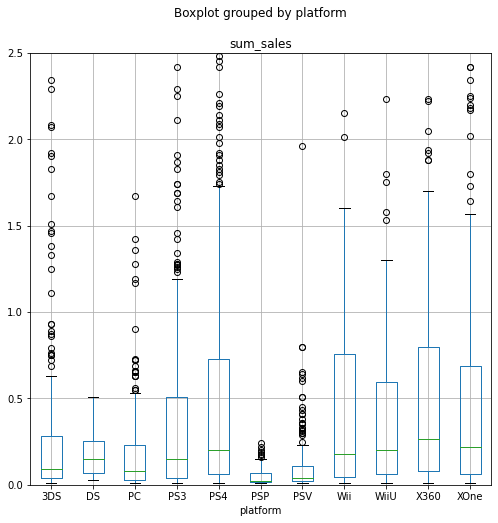

In [29]:
current_data.boxplot('sum_sales', figsize=(8, 8), by='platform').set_ylim(0, 2.5);

Медианные продажи у всех платформ находились на уровне примерно ниже 250 тысяч проданных копий. Большинство продаж находились в диапазоне примерно до 750 тысяч проданных копий. Выбросы на графике, вероятно, связаны с выпуском высокобюджетных игр, которые оправдали себя. Наиболее стабильными платформами на протяжении последних 3 лет являлись PS4, XOne, Wii и X360.

##### Влияние оценки критиков и пользовательского рейтинга на продажи

Для примера возьмем данные для актуальных в последние годы платформ: 3DS, PS4 и XOne:

In [30]:
three_ds = current_data.query("platform == '3DS'")
ps4 = current_data.query("platform == 'PS4'")
xone = current_data.query("platform == 'XOne'")

Построим диаграммы рассеивания для изучения зависимости продаж от оценки критиков:

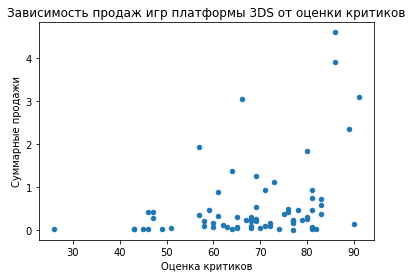

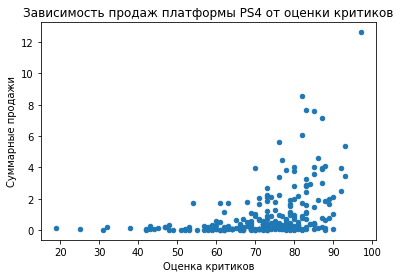

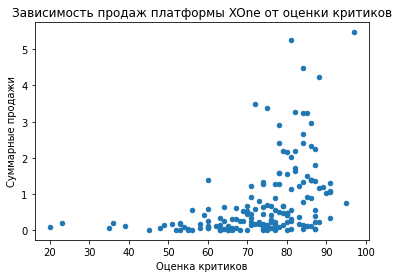

In [31]:
three_ds.plot(x='critic_score', y='sum_sales', kind="scatter")
plt.title('Зависимость продаж игр платформы 3DS от оценки критиков')
plt.ylabel('Суммарные продажи')
plt.xlabel('Оценка критиков')
plt.show();

ps4.plot(x='critic_score', y='sum_sales', kind="scatter")
plt.title('Зависимость продаж платформы PS4 от оценки критиков')
plt.ylabel('Суммарные продажи')
plt.xlabel('Оценка критиков')
plt.show();

xone.plot(x='critic_score', y='sum_sales', kind="scatter")
plt.title('Зависимость продаж платформы XOne от оценки критиков')
plt.ylabel('Суммарные продажи')
plt.xlabel('Оценка критиков')
plt.show();

Рассчитаем коэффициент корреляции Пирсона:

In [32]:
print("коэффициент корреляции для 3DS: ")
print(three_ds["sum_sales"].corr(data['critic_score']))
print("коэффициент корреляции для PS4: ")
print(ps4['sum_sales'].corr(data['critic_score']))
print("коэффициент корреляции для XOne: ")
print(xone['sum_sales'].corr(data['critic_score']))

коэффициент корреляции для 3DS: 
0.35705661422881035
коэффициент корреляции для PS4: 
0.406567902061781
коэффициент корреляции для XOne: 
0.41699832800840175


Присутствует средняя положительная корреляция (коэффициент корреляции в районе 0.3 - 0.4). Теперь оценим взаимосвязь продаж с пользовательским рейтингом, построив диаграммы рассеивания:

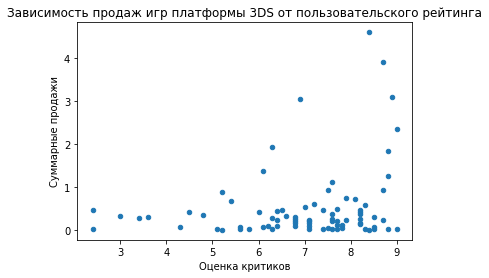

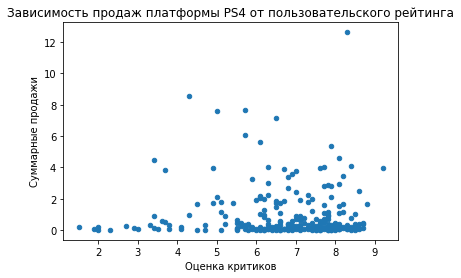

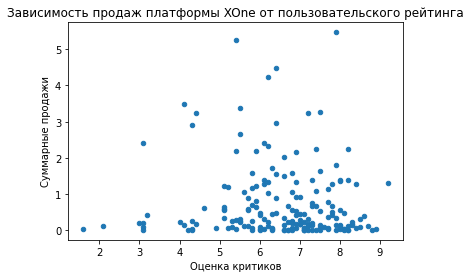

In [33]:
three_ds.plot(x='user_score', y='sum_sales', kind="scatter")
plt.title('Зависимость продаж игр платформы 3DS от пользовательского рейтинга')
plt.ylabel('Суммарные продажи')
plt.xlabel('Оценка критиков')
plt.show();

ps4.plot(x='user_score', y='sum_sales', kind="scatter")
plt.title('Зависимость продаж платформы PS4 от пользовательского рейтинга')
plt.ylabel('Суммарные продажи')
plt.xlabel('Оценка критиков')
plt.show();

xone.plot(x='user_score', y='sum_sales', kind="scatter")
plt.title('Зависимость продаж платформы XOne от пользовательского рейтинга')
plt.ylabel('Суммарные продажи')
plt.xlabel('Оценка критиков')
plt.show();

Рассчитаем коэффициент корреляции Пирсона:

In [34]:
print("коэффициент корреляции для 3DS: ")
print(three_ds["sum_sales"].corr(data['user_score']))
print("коэффициент корреляции для PS4: ")
print(ps4['sum_sales'].corr(data['user_score']))
print("коэффициент корреляции для XOne: ")
print(xone['sum_sales'].corr(data['user_score']))

коэффициент корреляции для 3DS: 
0.24150411773563016
коэффициент корреляции для PS4: 
-0.031957110204556376
коэффициент корреляции для XOne: 
-0.06892505328279412


Присутствуют либо слабая положительная корреляция, либо корреляция практически отсутствует.

**Вывод**: оценки критиков влияют на продажи в положительную сторону, оценки пользователи не имеют такого влияния.

##### Самые популярные жанры игр

Построим график по самым распространенным жанрам за последние 3 года:

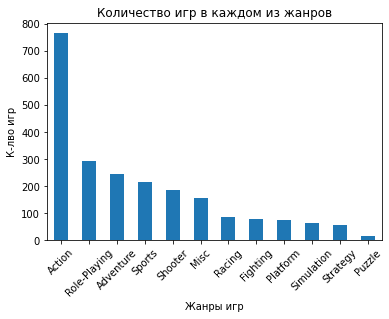

In [35]:
current_data.groupby("genre")["name"].count().sort_values(ascending=False).plot.bar(rot=45, xlabel="Жанры игр", title="Количество игр в каждом из жанров", ylabel="К-лво игр");

Самые популярные жанры: 
   1. Action (сильный отрыв от прочих игр)
   2. Role-playing
   3. Adventure
   4. Sports
   5. Shooter

##### Самые прибыльные жанры за последние 3 года

Построим график по самым прибыльным жанрам, используя в качестве метрики медианные продажи:

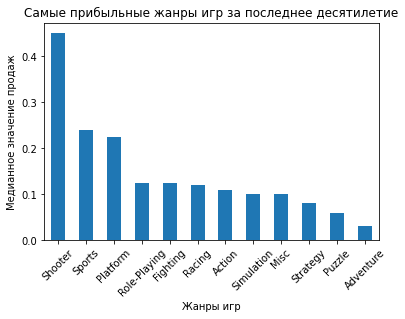

In [36]:
current_data.groupby("genre")["sum_sales"].median().sort_values(ascending=False).plot.bar(rot=45, xlabel="Жанры игр", title="Самые прибыльные жанры игр за последнее десятилетие", ylabel="Медианное значение продаж");

Согласно графику, наиболее стабильно приносят прибыль следующие жанры:

    1. Shooter (с большим отрывом от остальных)
    2. Sports
    3. Platform
    4. Role-Playing
    5. Fighting

#### Портрет пользователя каждого региона

##### Самые популярные платформы для NA, EU, JP

Найдем топ-5 платформ для каждого региона:

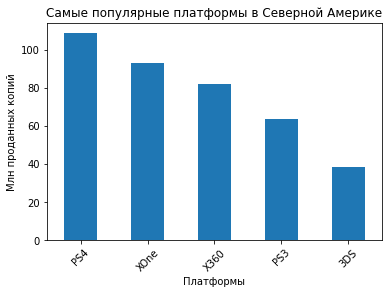

In [37]:
current_data.groupby("platform")["na_sales"].sum().sort_values(ascending=False).head(5).plot.bar(rot=45, xlabel="Платформы", title="Самые популярные платформы в Северной Америке", ylabel="Млн проданных копий");

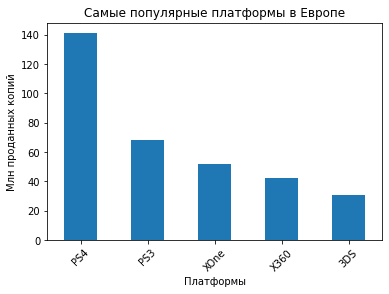

In [38]:
current_data.groupby("platform")["eu_sales"].sum().sort_values(ascending=False).head(5).plot.bar(rot=45, xlabel="Платформы", title="Самые популярные платформы в Европе", ylabel="Млн проданных копий");

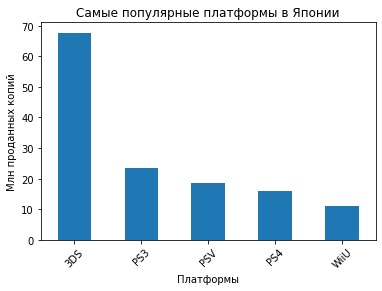

In [39]:
current_data.groupby("platform")["jp_sales"].sum().sort_values(ascending=False).head(5).plot.bar(rot=45, xlabel="Платформы", title="Самые популярные платформы в Японии", ylabel="Млн проданных копий");

Найдем долю продаж в каждом регионе:

In [40]:
current_data.groupby("platform")["na_sales"].sum().sort_values(ascending=False).head(5) / current_data["na_sales"].sum()

platform
PS4     0.248429
XOne    0.212744
X360    0.186562
PS3     0.145073
3DS     0.087272
Name: na_sales, dtype: float64

In [41]:
current_data.groupby("platform")["eu_sales"].sum().sort_values(ascending=False).head(5) / current_data["eu_sales"].sum()

platform
PS4     0.359712
PS3     0.172883
XOne    0.131530
X360    0.108406
3DS     0.078933
Name: eu_sales, dtype: float64

In [42]:
current_data.groupby("platform")["jp_sales"].sum().sort_values(ascending=False).head(5) / current_data["jp_sales"].sum()

platform
3DS     0.481674
PS3     0.165862
PSV     0.132050
PS4     0.113368
WiiU    0.077284
Name: jp_sales, dtype: float64

**Вывод:**
Для Северной Америки наиболее популярны две платформы - PS4 и XOne (занимают обе около 25% и 21% от общего числа продаж соответственно), далее следуют X360 и PS3 (занимают 18% и 14% соответственно от общего числа продаж), на 5 месте - 3DS (9% от общего числа продаж).

Для Европы наиболее популярной платформой является PS4 (36%), далее второе место занимает PS3 (17%), третье место - XOne (13%), четвертое место - X360 (11%), пятое место - 3DS (8%).

Для Японии самая популярная платформа - 3DS (48% всех продаж). Второе место - PS3 (16%), третье - PSV (13%), четвертое место делят PS4 (11%) и PS4 (7%).

##### Самые популярные жанры для NA, EU и JP

In [43]:
current_data.groupby("genre")["na_sales"].sum().sort_values(ascending=False).head(5)

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

In [44]:
current_data.groupby("genre")["eu_sales"].sum().sort_values(ascending=False).head(5)

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

In [45]:
current_data.groupby("genre")["jp_sales"].sum().sort_values(ascending=False).head(5)

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

**Вывод:**

Симпатии по регионам распределились следующим образом:

Наиболее любимый жанры у американцев - Action, Shooter, Sports, Role-Playing, Misc.

Фавориты европейцев в целом схожи -  Action, Shooter, Sports, Role-Playing, Racing.

Предпочтения японцев распределены совершенно по-другому, Role-Playng лидирует в списке, затем идут жанры  Action, Misc, Fighting, Shooter. 

##### Влияние рейтинга ESRB на продажи

Рассмотрим какие рейтинги существуют в исследуемом датасете:

In [46]:
current_data["rating"].unique()

array(['M', 'no rating', 'E', 'T', 'E10+'], dtype=object)

Присвоим понятные значения обозначениям рейтинга:

In [47]:
ESRB = {'E': 'Для всех', 'M': '18+', 'T': 'от 13 лет', 'E10+': 'от 10 лет', 'K-A': 'Для всех', 'AO': "18+", 'EC': "от 3 лет", 'RP': "Рейтинг ожидается"}

current_data["rating"] = current_data["rating"].replace(ESRB)

/tmp/ipykernel_145/2640529002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_data["rating"] = current_data["rating"].replace(ESRB)


Проверим, вступили ли изменения в силу:

In [48]:
current_data["rating"].unique()

array(['18+', 'no rating', 'Для всех', 'от 13 лет', 'от 10 лет'],
      dtype=object)

Построим графики продаж по возрастному рейтингу в каждом регионе:

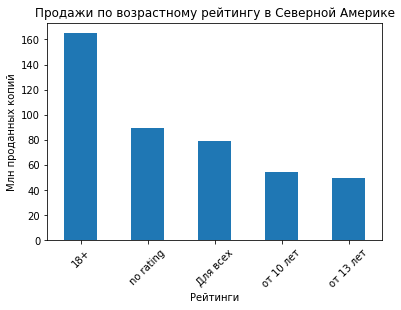

In [49]:
current_data.groupby("rating")["na_sales"].sum().sort_values(ascending=False).plot.bar(rot=45, xlabel="Рейтинги", title="Продажи по возрастному рейтингу в Северной Америке", ylabel="Млн проданных копий");

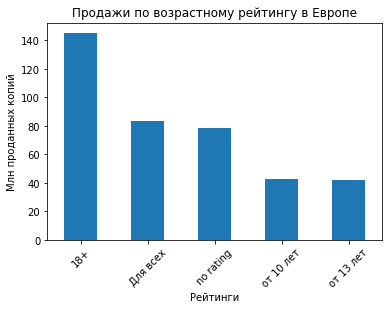

In [50]:
current_data.groupby("rating")["eu_sales"].sum().sort_values(ascending=False).plot.bar(rot=45, xlabel="Рейтинги", title="Продажи по возрастному рейтингу в Европе", ylabel="Млн проданных копий");

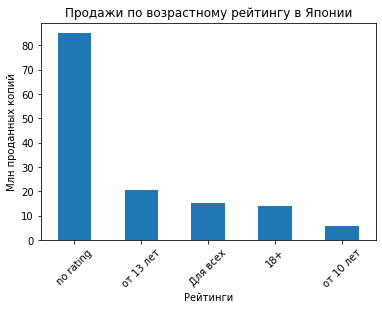

In [51]:
current_data.groupby("rating")["jp_sales"].sum().sort_values(ascending=False).plot.bar(rot=45, xlabel="Рейтинги", title="Продажи по возрастному рейтингу в Японии", ylabel="Млн проданных копий");

Для Северной Америки и Европы первое место по выручке занимают игры с рейтингом "18+", второе место делят игры "без рейтинга" и "для всех". Наименее популярные игры для подростковой аудитории - с 10 и с 13 лет.

Для Японии картина отличается: большую выручку дают игры без указанного рейтинга, поскольку рейтинг ESRB принят для компьютерных игр, выпущенных в Канаде и США.

#### Статистический анализ данных

##### Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы:

**Нулевая гипотеза**: Средний пользовательский рейтинг Xbox One и PC одинаковые.

**Альтернативная гипотеза**: Средний пользовательский рейтинг Xbox One и PC не одинаковые.

Применим двухсторонний t-тест для независимых выборок:


In [52]:
results = st.ttest_ind(current_data.dropna().query("platform == 'XOne'")["user_score"], current_data.dropna().query("platform == 'PC'")["user_score"], alternative = 'two-sided')

alpha = 0.05

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. p-value равен: ", results.pvalue)
else:
    print("Не получилось отвергнуть нулевую гипотезу. p-value равен: ", results.pvalue)

Не получилось отвергнуть нулевую гипотезу. p-value равен:  0.17306926618147322


Не получилось отвергнуть нулевую гипотезу, следовательно, нет оснований считать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.

##### Проверка гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую и альтернативную гипотезы:

**Нулевая гипотеза**: Средние пользовательские рейтинги жанров Action и Sports  одинаковые.

**Альтернативная гипотеза**: Средние пользовательские рейтинги жанров Action и Sports  разные.

Применим двухсторонний t-тест для независимых выборок:


In [53]:
results = st.ttest_ind(current_data.dropna().query("genre == 'Action'")["user_score"], current_data.dropna().query("genre == 'Sports'")["user_score"], alternative = 'two-sided')

alpha = 0.05

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. p-value равен: ", results.pvalue)
else:
    print("Не получилось отвергнуть нулевую гипотезу. p-value равен: ", results.pvalue)

Отвергаем нулевую гипотезу. p-value равен:  1.684099430689953e-16


Нулевая гипотеза была отвергнута, следовательно,  есть основания считать, что средние пользовательские рейтинги статистически значимо отличаются друг от друга.

#### Заключение

Над исходными данными были проведены различные манипуляции: был осуществлен общий обзор данных, произведена предобработка данных (удаление пропусков), исследовательский и статистический анализ данных.

В результате были получены следующие выводы:

1. Наблюдается общий спад продаж на рынке компьютерных игр с 2010 года.
2. Платформами за наибольшими суммарными продажами за всю историю компьютерных игр являются PS2, X360, PS3, Wii, DS, PS.
3. Средняя продолжительности жизни платформы около 10 лет. Сейчас наиболее популярные платформы - PS4 и XOne.
4. На продажи игр в положительную сторону влияет оценка критиков (коэффициент корреляции Пирсона примерно равен 0.4). Пользовательский рейтинг никак не влияет.
5. Самые прибыльные жанры, исходя из медианных продаж -  Shooter (с большим отрывом от остальных), Sports, Platform, Role-Playing и Fighting.
6. Портреты типичного пользователя из Северной Америки и Европы более или менее совпадают, японская аудитория отличается сильней по своим предпочтениям (более подробно - см. в разделе "Типичный портрет пользователя по регионам")
7. Нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.
8. Есть основания считать, что средние пользовательские рейтинги жанров Action и Sports статистически значимо отличаются друг от друга.


**Прогноз и рекомендации для бизнеса на 2017 год:**

1. Продажи компьютерных игр, в целом, вероятно, будут падать. Следует ожидать снижение продаж.
2. Наиболее перспективные платформы, которые выдержат удар - это PS4 и XOne. Остальные платформы, вероятно, будут угасать или совсем исчезнут.
3. Надежный прибыльный жанр, на который можно возлагать ожидания и надежды - шутер.
4. Исходя из этого, лучше ориентироваться на потребителей из Северной Америки и Европы: шутеры -  второй по популярности жанр у данной аудитории.
5. Более прибыльные игры имеют более высокую оценку критиков, пользовательские оценки учитывать не стоит.